In [1]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import pygad.kerasga
import pygad

In [2]:
# Collecting data

url_tv_strategy = "http://161.97.165.206:57895/services/tv_internal_strategy"
data = pd.read_json(url_tv_strategy)

data.tail(5)

,time,Supertrend_$time,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,Supertrend_indicator,SMA_30_$time,SMA_30_MA,SMA_30_Smoothing_Line,SMA_30_indicator,...,candle_min,candle_volume,candle_indicator,round,round_position,round_position_value,round_close_at,round_lock_price,round_close_price,round_noroundid
963,1667790360,1667790360,339.90,338.679804,1.000000e+100,Supertrend,1667790360,339.653333,339.260667,SMA_30,...,339.8,79.01,candle,118409,Bear,0,2022-11-07 03:11:33,340.00316424,339.92,
964,1667790000,1667790000,340.95,338.679804,1.000000e+100,Supertrend,1667790000,339.283333,338.804667,SMA_30,...,340.6,178.27,candle,118408,Bear,0,2022-11-07 03:06:24,340.81095383,340.00316424,
965,1667789820,1667789820,341.00,338.679804,1.000000e+100,Supertrend,1667789820,339.063333,338.545333,SMA_30,...,340.6,120.93,candle,118407,Bull,1,2022-11-07 03:01:15,340.68504038,340.81095383,
966,1667789460,1667789460,340.85,338.679804,1.000000e+100,Supertrend,1667789460,338.576667,337.994667,SMA_30,...,340.7,65.32,candle,118406,Bear,0,2022-11-07 02:56:06,340.91,340.68504038,
967,1667789100,1667789100,340.90,338.679804,1.000000e+100,Supertrend,1667789100,337.986667,337.421333,SMA_30,...,340.6,70.99,candle,118405,Bull,1,2022-11-07 02:51:00,340.78,340.91,


In [3]:
# Remove unused columns
data.drop([
    'time',
    'Supertrend_$time',
    'Supertrend_indicator',
    'SMA_30_$time',
    'SMA_30_indicator',
    'SMA_50_$time',
    'SMA_50_indicator',
    'SMA_100_$time',
    'SMA_100_indicator',
    'SMA_200_$time',
    'SMA_200_indicator',
    'EMA_30_$time',
    'EMA_30_indicator',
    'EMA_50_$time',
    'EMA_50_indicator',
    'EMA_100_$time',
    'EMA_100_indicator',
    'EMA_200_$time',
    'EMA_200_indicator',
    'RSI_$time',
    'RSI_indicator',
    'RSI_Upper_Bollinger_Band',
    'RSI_Lower_Bollinger_Band',
    'RSI_fill_1_colorer',
    'Stochastic_$time',
    'Stochastic_indicator',
    'Bollinger_Bands_$time',
    'Bollinger_Bands_indicator',
    'ATR_$time',
    'ATR_indicator',
    'candle_time',
    'candle_indicator',
    'round',
    'round_position',
    'round_close_at',
    'round_lock_price',
    'round_close_price'], axis=1, inplace=True)

data.tail(5)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value,round_noroundid
963,339.90,338.679804,1.000000e+100,339.653333,339.260667,337.156,336.9652,340.283,340.4990,346.2380,...,342.147725,339.512275,0.788603,339.8,340.0,340.0,339.8,79.01,0,
964,340.95,338.679804,1.000000e+100,339.283333,338.804667,336.982,336.7496,340.506,340.7034,346.3705,...,342.276677,339.293323,0.837781,341.2,340.7,341.2,340.6,178.27,0,
965,341.00,338.679804,1.000000e+100,339.063333,338.545333,336.868,336.6384,340.608,340.8028,346.4360,...,342.596897,338.693103,0.841979,340.6,341.4,341.4,340.6,120.93,1,
966,340.85,338.679804,1.000000e+100,338.576667,337.994667,336.630,336.4336,340.802,341.0042,346.5645,...,343.025183,337.564817,0.850592,340.8,340.9,341.1,340.7,65.32,0,
967,340.90,338.679804,1.000000e+100,337.986667,337.421333,336.426,336.2344,341.003,341.2076,346.6960,...,343.255640,336.534360,0.922953,340.8,341.0,341.0,340.6,70.99,1,


In [4]:
data.head(1)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value,round_noroundid
0,310.3,304.96842,1.000000e+100,308.02,307.883333,305.496,304.908,292.883,292.1466,285.2745,...,312.335037,304.254963,1.910324,309.6,310.8,311.4,309.1,326.49,,FIRST


In [5]:
# Set maindataset
main_data = data.copy()

In [6]:
# Separate FIRST to prediction set and remove from main data set, also remove round_noroundid column
data_prediction = main_data.loc[main_data['round_noroundid'] == 'FIRST'].copy()
data_prediction.drop(['round_noroundid'], axis=1, inplace=True)

main_data.drop(main_data[main_data['round_noroundid'] == 'FIRST'].index, inplace=True)
main_data.drop(['round_noroundid'], axis=1, inplace=True)

# Convert round position value (future y) to float
# main_data['round_position_value'] = pd.to_numeric(main_data['round_position_value'])
main_data['round_position_value'] = main_data['round_position_value'].astype(float)

data_prediction

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value
0,310.3,304.96842,1.000000e+100,308.02,307.883333,305.496,304.908,292.883,292.1466,285.2745,...,308.295,312.335037,304.254963,1.910324,309.6,310.8,311.4,309.1,326.49,


In [7]:
main_data.head(5)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value
1,310.30,304.968420,1.000000e+100,307.920000,307.687333,304.928,304.3312,292.153,291.4004,285.0030,...,307.720,312.102967,303.337033,1.974474,310.7,309.9,310.7,309.1,219.70,0.0
2,310.60,304.387133,1.000000e+100,307.740000,307.380000,304.308,303.7332,291.406,290.6366,284.7085,...,307.170,311.474927,302.865073,2.070956,309.8,311.4,311.9,309.3,1034.80,0.0
3,309.75,303.825557,1.000000e+100,307.546667,307.156000,304.062,303.4092,291.019,290.2480,284.5650,...,307.030,310.939527,303.120473,2.012173,309.9,309.6,310.3,309.3,568.50,1.0
4,309.85,303.825557,1.000000e+100,307.220000,306.625333,303.454,302.6996,290.253,289.4862,284.2790,...,307.080,311.136402,303.023598,2.227374,310.7,309.0,310.9,307.8,539.89,0.0
5,308.65,303.825557,1.000000e+100,306.620000,306.041333,302.688,301.9520,289.463,288.7590,283.9825,...,307.015,310.855976,303.174024,2.089351,308.2,309.1,309.6,307.3,618.98,1.0


In [8]:
main_data.dtypes

Supertrend_Plot           float64
Supertrend_Up_Trend       float64
Supertrend_Down_Trend     float64
SMA_30_MA                 float64
SMA_30_Smoothing_Line     float64
SMA_50_MA                 float64
SMA_50_Smoothing_Line     float64
SMA_100_MA                float64
SMA_100_Smoothing_Line    float64
SMA_200_MA                float64
SMA_200_Smoothing_Line    float64
EMA_30_EMA                float64
EMA_30_Smoothing_Line     float64
EMA_50_EMA                float64
EMA_50_Smoothing_Line     float64
EMA_100_EMA               float64
EMA_100_Smoothing_Line    float64
EMA_200_EMA               float64
EMA_200_Smoothing_Line    float64
RSI_RSI                   float64
RSI_RSIbased_MA           float64
Stochastic_K              float64
Stochastic_D              float64
Bollinger_Bands_Basis     float64
Bollinger_Bands_Upper     float64
Bollinger_Bands_Lower     float64
ATR_ATR                   float64
candle_open               float64
candle_close              float64
candle_max    

In [9]:
# Create X & y values (features and labels)

# The X (independent variables) will be every column of DataFrame except charges
X = main_data.drop("round_position_value", axis=1)

# The y (dependent or label) is charges column
y = main_data["round_position_value"]

# Remove from data_prediction the empty round_position_value
data_prediction.drop("round_position_value", axis=1, inplace=True)

In [10]:
X.head()

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Stochastic_D,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume
1,310.30,304.968420,1.000000e+100,307.920000,307.687333,304.928,304.3312,292.153,291.4004,285.0030,...,83.960438,307.720,312.102967,303.337033,1.974474,310.7,309.9,310.7,309.1,219.70
2,310.60,304.387133,1.000000e+100,307.740000,307.380000,304.308,303.7332,291.406,290.6366,284.7085,...,84.114500,307.170,311.474927,302.865073,2.070956,309.8,311.4,311.9,309.3,1034.80
3,309.75,303.825557,1.000000e+100,307.546667,307.156000,304.062,303.4092,291.019,290.2480,284.5650,...,80.116144,307.030,310.939527,303.120473,2.012173,309.9,309.6,310.3,309.3,568.50
4,309.85,303.825557,1.000000e+100,307.220000,306.625333,303.454,302.6996,290.253,289.4862,284.2790,...,72.119628,307.080,311.136402,303.023598,2.227374,310.7,309.0,310.9,307.8,539.89
5,308.65,303.825557,1.000000e+100,306.620000,306.041333,302.688,301.9520,289.463,288.7590,283.9825,...,50.975610,307.015,310.855976,303.174024,2.089351,308.2,309.1,309.6,307.3,618.98


In [11]:
y.head(20)

1     0.0
2     0.0
3     1.0
4     0.0
5     1.0
6     0.0
7     1.0
8     1.0
9     0.0
10    0.0
11    1.0
12    1.0
13    0.0
14    0.0
15    1.0
16    1.0
17    0.0
18    1.0
19    1.0
20    1.0
Name: round_position_value, dtype: float64

In [12]:
data_prediction

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Stochastic_D,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume
0,310.3,304.96842,1.000000e+100,308.02,307.883333,305.496,304.908,292.883,292.1466,285.2745,...,83.105104,308.295,312.335037,304.254963,1.910324,309.6,310.8,311.4,309.1,326.49


In [13]:
# Split dataset in random set to train using sklearn
# Separate 20% (0.2) for test and 80% to train
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# X_train.shape, y_train.shape
X.shape, y.shape

((967, 32), (967,))

In [15]:
# X_test.shape, y_test.shape

In [16]:
# Normalize data


# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), [
        "Supertrend_Plot",
        "Supertrend_Up_Trend",
        "Supertrend_Down_Trend",
        "SMA_30_MA",
        "SMA_30_Smoothing_Line",
        "SMA_50_MA",
        "SMA_50_Smoothing_Line",
        "SMA_100_MA",
        "SMA_100_Smoothing_Line",
        "SMA_200_MA",
        "SMA_200_Smoothing_Line",
        "EMA_30_EMA",
        "EMA_30_Smoothing_Line",
        "EMA_50_EMA",
        "EMA_50_Smoothing_Line",
        "EMA_100_EMA",
        "EMA_100_Smoothing_Line",
        "EMA_200_EMA",
        "EMA_200_Smoothing_Line",
        "RSI_RSI",
        "RSI_RSIbased_MA",
        "Stochastic_K",
        "Stochastic_D",
        "Bollinger_Bands_Basis",
        "Bollinger_Bands_Upper",
        "Bollinger_Bands_Lower",
        "ATR_ATR",
        "candle_open",
        "candle_close",
        "candle_max",
        "candle_min",
        "candle_volume"]) # turn all values in these columns between 0 and 1
)

# Fit the column transformer to our training data
ct.fit(X)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_normal = ct.transform(X)
data_prediction_normal = ct.transform(data_prediction)

In [17]:
X.head(1), X_normal[0], y

(   Supertrend_Plot  Supertrend_Up_Trend  Supertrend_Down_Trend  SMA_30_MA  \
 1            310.3            304.96842          1.000000e+100     307.92   
 
    SMA_30_Smoothing_Line  SMA_50_MA  SMA_50_Smoothing_Line  SMA_100_MA  \
 1             307.687333    304.928               304.3312     292.153   
 
    SMA_100_Smoothing_Line  SMA_200_MA  ...  Stochastic_D  \
 1                291.4004     285.003  ...     83.960438   
 
    Bollinger_Bands_Basis  Bollinger_Bands_Upper  Bollinger_Bands_Lower  \
 1                 307.72             312.102967             303.337033   
 
     ATR_ATR  candle_open  candle_close  candle_max  candle_min  candle_volume  
 1  1.974474        310.7         309.9       310.7       309.1          219.7  
 
 [1 rows x 32 columns],
 array([3.84000000e-01, 4.42955057e-99, 1.00000000e+00, 3.89581043e-01,
        3.88326553e-01, 4.05907849e-01, 4.00340105e-01, 3.20512652e-01,
        3.10616888e-01, 1.58291834e-01, 1.54022059e-01, 4.10072898e-01,
        4.

In [67]:
# Create function to build binary classification
# def fitness_func(solution, sol_idx):
#    global X_normal, y, keras_ga, model_1

#    predictions = pygad.kerasga.predict(model=model_1,
#                                        solution=solution,
#                                        data=X_normal)

#    bce = tf.keras.losses.BinaryCrossentropy()
#    solution_fitness = 1.0 / (bce(y, predictions).numpy() + 0.00000001)

#    return solution_fitness

def fitness_func(solution, sol_idx):
    global X_normal, y, keras_ga, model_1

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model_1,
                                                                 weights_vector=solution)

    model_1.set_weights(weights=model_weights_matrix)

    predictions = model_1.predict(X_normal, verbose=0)
    
    bce = tf.keras.losses.BinaryCrossentropy()
    solution_fitness = 1.0 / (bce(y, predictions).numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))


In [68]:
# Build a neural network model to fit on our normalized data

# Build the keras model using the functional API.
input_layer  = tf.keras.layers.Input(32)
dense_layer_1 = tf.keras.layers.Dense(10, activation="relu")(input_layer)
dense_layer_2 = tf.keras.layers.Dense(10, activation="relu")(dense_layer_1)
output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(dense_layer_2)
model_1 = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# model_1 = tf.keras.Sequential([
#     tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
#     tf.keras.layers.Dense(3, activation=tf.keras.activations.relu),
#     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
# ])


# Create an instance of the pygad.kerasga.KerasGA class to build the initial population.
keras_ga = pygad.kerasga.KerasGA(model=model_1, num_solutions=10)


# # 1. Create the model
# model_1 = tf.keras.Sequential([
#     tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
#     tf.keras.layers.Dense(3, activation=tf.keras.activations.relu),
#     tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
# ])

# # 2. Compile the model
# model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#                 metrics=["accuracy"])

# # 3. Fit the model
# history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=180, verbose=0)

Generation = 1
Fitness    = 1.4406295375062883
Generation = 2
Fitness    = 1.4406295375062883
Generation = 3
Fitness    = 1.4406295375062883
Generation = 4
Fitness    = 1.4406295375062883
Generation = 5
Fitness    = 1.4421457668574535
Generation = 6
Fitness    = 1.4421457668574535
Generation = 7
Fitness    = 1.4435593582314588
Generation = 8
Fitness    = 1.4435593582314588
Generation = 9
Fitness    = 1.4435593582314588
Generation = 10
Fitness    = 1.4435593582314588
Generation = 11
Fitness    = 1.4435593582314588
Generation = 12
Fitness    = 1.4435593582314588
Generation = 13
Fitness    = 1.4435593582314588
Generation = 14
Fitness    = 1.4435593582314588
Generation = 15
Fitness    = 1.4435593582314588
Generation = 16
Fitness    = 1.4435593582314588
Generation = 17
Fitness    = 1.4435593582314588
Generation = 18
Fitness    = 1.4435593582314588
Generation = 19
Fitness    = 1.4435593582314588
Generation = 20
Fitness    = 1.4435593582314588
Generation = 21
Fitness    = 1.4435593582314588
G

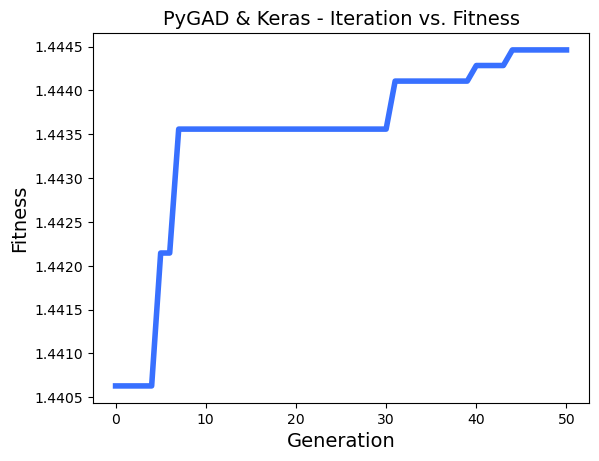

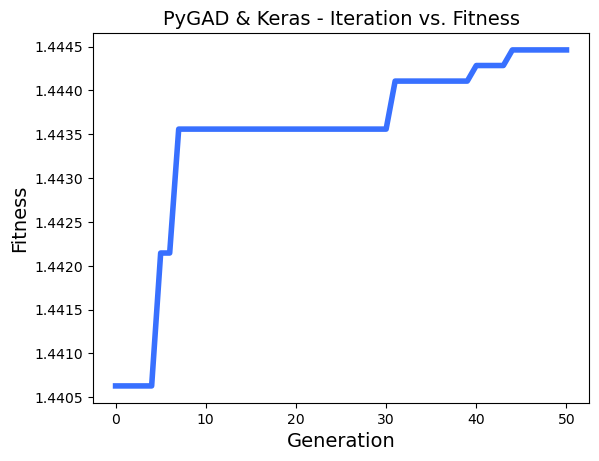

In [69]:
# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 50 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = keras_ga.population_weights # Initial population of network weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       # suppress_warnings=True,
                       on_generation=callback_generation)

# Start the genetic algorithm evolution.
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

In [70]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Make predictions based on the best solution.
predictions = pygad.kerasga.predict(model=model_1,
                                    solution=solution,
                                    data=X_normal)
print("Predictions : \n", predictions)

Fitness value of the best solution = 1.4444626665107207
Index of the best solution : 0
31/31 [==============================] - 0s 416us/step
Predictions : 
 [[0.49249533]
 [0.49839246]
 [0.49458632]
 [0.49429455]
 [0.5       ]
 [0.49863866]
 [0.4914476 ]
 [0.4956527 ]
 [0.49054137]
 [0.4954385 ]
 [0.49896765]
 [0.49130943]
 [0.49343202]
 [0.49804568]
 [0.4993329 ]
 [0.49813935]
 [0.49722406]
 [0.496286  ]
 [0.49464825]
 [0.49512073]
 [0.49555895]
 [0.4955399 ]
 [0.49337313]
 [0.4938897 ]
 [0.4935869 ]
 [0.4965322 ]
 [0.4931937 ]
 [0.49207723]
 [0.4907132 ]
 [0.48945346]
 [0.48995462]
 [0.48575303]
 [0.48204398]
 [0.48186094]
 [0.4803058 ]
 [0.480115  ]
 [0.48151353]
 [0.48070896]
 [0.48117796]
 [0.48242843]
 [0.4820631 ]
 [0.48241004]
 [0.48214793]
 [0.48181245]
 [0.48058942]
 [0.4791477 ]
 [0.48197898]
 [0.48362267]
 [0.47930104]
 [0.47290182]
 [0.47993734]
 [0.4809374 ]
 [0.4798231 ]
 [0.48018718]
 [0.47841176]
 [0.48050585]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [

In [71]:
# Calculate the binary crossentropy for the trained model.
bce = tf.keras.losses.BinaryCrossentropy()
print("Binary Crossentropy : ", bce(y, predictions).numpy())

Binary Crossentropy :  0.69229895


In [72]:
# Calculate the classification accuracy for the trained model.
ba = tf.keras.metrics.BinaryAccuracy()
ba.update_state(y, predictions)
accuracy = ba.result().numpy()
print("Accuracy : ", accuracy)

Accuracy :  0.5263702


In [73]:
# Evaluate our insurance model trained on normalized data

# model_1.evaluate(X_test_normal, y_test)

In [74]:
# Try and make a prediction using our model
y_pred = model_1.predict(data_prediction_normal)
y_pred

1/1 [==============================] - 0s 14ms/step


array([[0.49479708]], dtype=float32)

In [75]:
y_pred[0][0]

0.49479708